In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from scipy.stats import poisson
import ipywidgets as widgets # using 7.6, >8.x not working for me


In [2]:
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby/3_modelling'

In [3]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [4]:
df = pd.read_csv('0_data/match_data/cleaned_match_data.csv')

df = df.loc[~df['Home team'].isin(['GRENOBLE', 'MONT-DE-MARSAN'])]

df.tail(14)

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
1414,2024-06-01,CARDIFF,OSPREYS,3.0,39_80_8,4.0,6_48_29_63,1.0,53,0.0,...,CARDIFF_OSPREYS_2024-06-01,29,33,-4,926,889,25,26,28,26
1415,2024-06-01,MONTPELLIER,LYON,4.0,20_47_68_58,4.0,33_82_70_75,2.0,14_28,0.0,...,MONTPELLIER_LYON_2024-06-01,41,26,15,922,892,26,28,27,27
1416,2024-06-01,CASTRES,PARIS,3.0,45_31_61,2.0,17_55,2.0,21_42,2.0,...,CASTRES_PARIS_2024-06-01,27,18,9,946,949,30,27,29,28
1417,2024-06-01,OYONNAX,BAYONNE,3.0,31_3_80,4.0,7_47_71_43,2.0,16_59,0.0,...,OYONNAX_BAYONNE_2024-06-01,27,20,7,910,921,27,29,29,27
1418,2024-06-01,PERPIGNAN,BORDEAUX,4.0,16_27_22_32,3.0,17_59_69,3.0,39_61_66,3.0,...,PERPIGNAN_BORDEAUX_2024-06-01,37,30,7,929,953,26,29,28,28
1419,2024-06-02,TOULOUSE,LA ROCHELLE,4.0,31_51_79_15,3.0,12_44_6,1.0,5,1.0,...,TOULOUSE_LA ROCHELLE_2024-06-02,31,31,0,910,924,26,27,28,29
1420,2024-06-02,TOULON,CLERMONT,6.0,40_76_67_14_42_34,1.0,4,4.0,9_11_22_28,1.0,...,TOULON_CLERMONT_2024-06-02,52,10,42,920,897,29,27,30,28
1421,2024-06-08,CLERMONT,MONTPELLIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CLERMONT_MONTPELLIER_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1422,2024-06-08,LA ROCHELLE,RACING 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LA ROCHELLE_RACING 92_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1423,2024-06-08,LYON,TOULOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LYON_TOULOUSE_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1


# Poisson

In [24]:
df.sort_values(by='match_date_', ascending=False).head(14)

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
1427,2024-06-08,BAYONNE,CASTRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BAYONNE_CASTRES_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1426,2024-06-08,BORDEAUX,OYONNAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BORDEAUX_OYONNAX_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1425,2024-06-08,PARIS,TOULON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PARIS_TOULON_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1424,2024-06-08,PAU,PERPIGNAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PAU_PERPIGNAN_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1423,2024-06-08,LYON,TOULOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LYON_TOULOUSE_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1422,2024-06-08,LA ROCHELLE,RACING 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LA ROCHELLE_RACING 92_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1421,2024-06-08,CLERMONT,MONTPELLIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CLERMONT_MONTPELLIER_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1420,2024-06-02,TOULON,CLERMONT,6.0,40_76_67_14_42_34,1.0,4,4.0,9_11_22_28,1.0,...,TOULON_CLERMONT_2024-06-02,52,10,42,920,897,29,27,30,28
1419,2024-06-02,TOULOUSE,LA ROCHELLE,4.0,31_51_79_15,3.0,12_44_6,1.0,5,1.0,...,TOULOUSE_LA ROCHELLE_2024-06-02,31,31,0,910,924,26,27,28,29
1413,2024-06-01,BATH,SALE,3.0,22_11_73,3.0,33_16_51,4.0,3_27_49_65,2.0,...,BATH_SALE_2024-06-01,31,23,8,937,892,28,28,26,28


In [25]:
test = df.loc[df['match_date_'] >= '2024-06-08'].reset_index(drop=True)
test

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2024-06-08,CLERMONT,MONTPELLIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CLERMONT_MONTPELLIER_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1,2024-06-08,LA ROCHELLE,RACING 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LA ROCHELLE_RACING 92_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
2,2024-06-08,LYON,TOULOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LYON_TOULOUSE_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
3,2024-06-08,PAU,PERPIGNAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PAU_PERPIGNAN_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
4,2024-06-08,PARIS,TOULON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PARIS_TOULON_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
5,2024-06-08,BORDEAUX,OYONNAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BORDEAUX_OYONNAX_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
6,2024-06-08,BAYONNE,CASTRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BAYONNE_CASTRES_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1


In [26]:
train = df.loc[df['match_date_'] < '2024-06-08'].reset_index(drop=True)
train.head(5)

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-04,BRIVE,PERPIGNAN,3.0,32_12_68,0.0,NaN,4.0,7_26_37_59,5.0,...,BRIVE_PERPIGNAN_2021-09-04,36,15,21,949,917,28,25,30,27
1,2021-09-04,CASTRES,PAU,1.0,18,0.0,NaN,3.0,32_22_68,3.0,...,CASTRES_PAU_2021-09-04,16,12,4,942,913,28,28,28,25
2,2021-09-04,PARIS,RACING 92,2.0,67_79,3.0,21_28_75,3.0,2_24_51,5.0,...,PARIS_RACING 92_2021-09-04,21,36,-15,927,899,28,25,28,26
3,2021-09-04,TOULON,MONTPELLIER,0.0,NaN,2.0,80_12,8.0,3_9_27_40_56_63_68_75,4.0,...,TOULON_MONTPELLIER_2021-09-04,24,24,0,957,920,29,24,29,27
4,2021-09-04,BIARRITZ,BORDEAUX,3.0,32_25_45,2.0,78_74,2.0,19_50,1.0,...,BIARRITZ_BORDEAUX_2021-09-04,27,15,12,901,933,27,28,30,26


In [27]:
# save the tries scored like a dict can be indexed

home_avg_tries_scored = train.groupby('Home team')['home_n_tries'].mean()
home_avg_tries_conceded = train.groupby('Home team')['away_n_tries'].mean()

away_avg_tries_scored = train.groupby('Away team')['away_n_tries'].mean()
away_avg_tries_conceded = train.groupby('Away team')['home_n_tries'].mean()

# overall averages
home_avg_tries_scored_overall = train['home_n_tries'].mean() # same as away tries conceded
away_avg_tries_scored_overall = train['away_n_tries'].mean() # same as home tries conceded

In [28]:
home_attack_strength = home_avg_tries_scored/home_avg_tries_scored_overall # higher is better attack

away_attack_strength = away_avg_tries_scored/away_avg_tries_scored_overall # higher is better attack


home_defence_strength = home_avg_tries_conceded/away_avg_tries_scored_overall # higher is worse defense

away_defence_strength = away_avg_tries_conceded/home_avg_tries_scored_overall # higher is worse defense

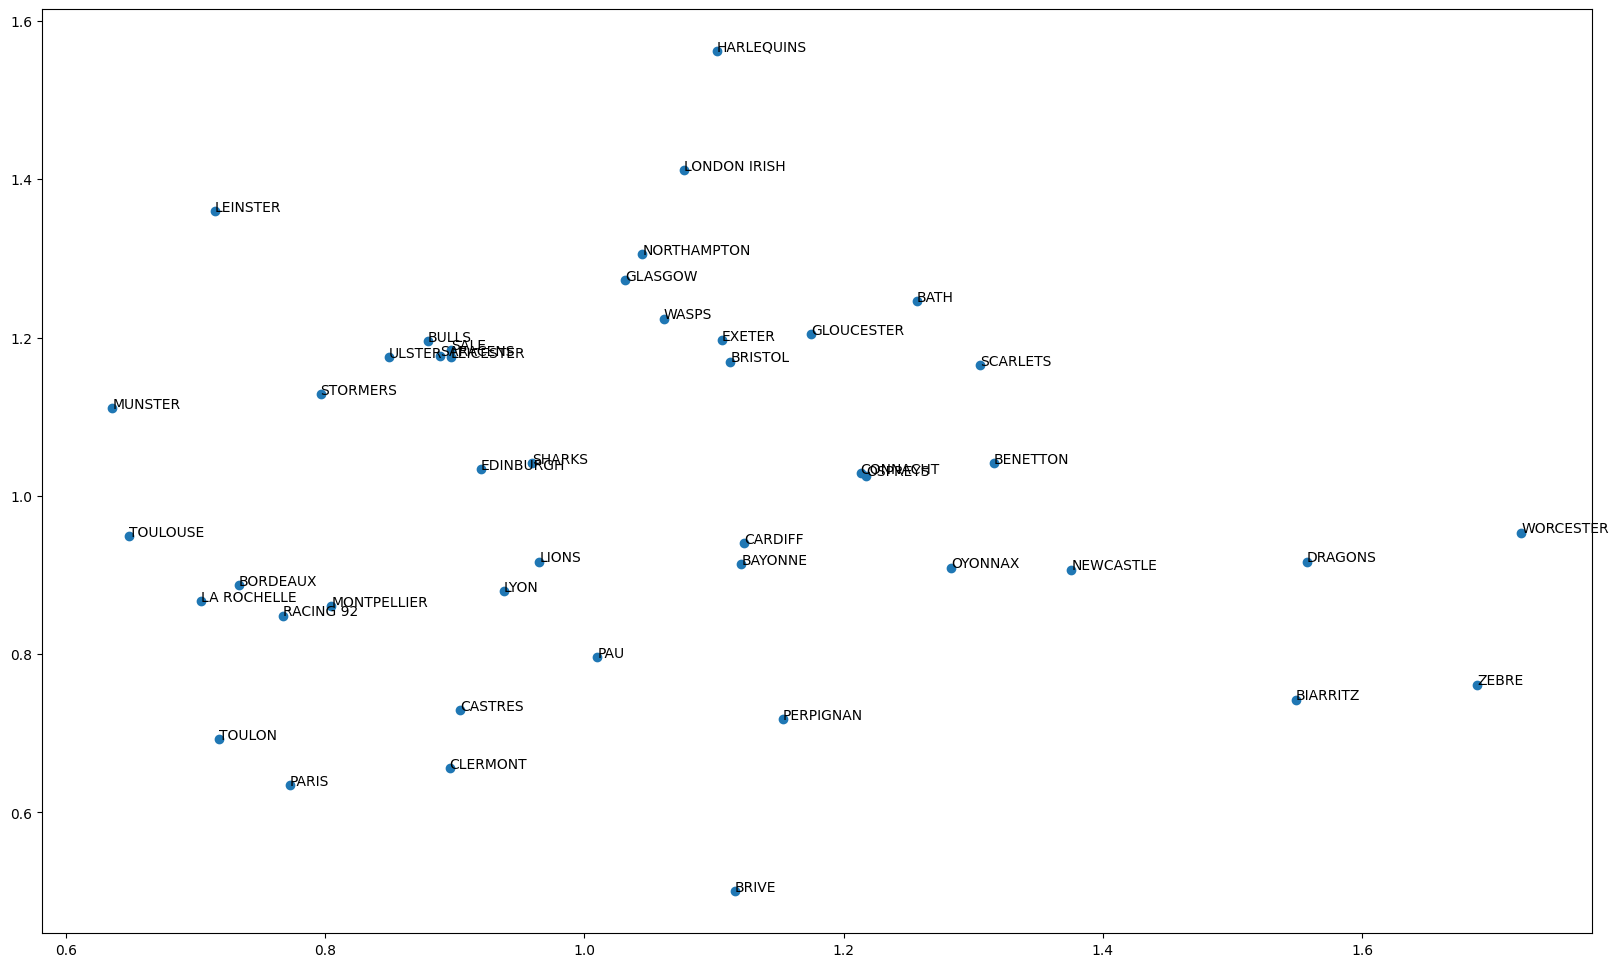

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(away_defence_strength.values, away_attack_strength.values)

for i, txt in enumerate(away_defence_strength.index):
    ax.annotate(txt, (away_defence_strength.values[i], away_attack_strength.values[i]))
    
plt.show()

In [102]:
test

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2024-06-08,CLERMONT,MONTPELLIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CLERMONT_MONTPELLIER_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
1,2024-06-08,LA ROCHELLE,RACING 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LA ROCHELLE_RACING 92_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
2,2024-06-08,LYON,TOULOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LYON_TOULOUSE_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
3,2024-06-08,PAU,PERPIGNAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PAU_PERPIGNAN_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
4,2024-06-08,PARIS,TOULON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PARIS_TOULON_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
5,2024-06-08,BORDEAUX,OYONNAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BORDEAUX_OYONNAX_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1
6,2024-06-08,BAYONNE,CASTRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BAYONNE_CASTRES_2024-06-08,-1,-1,0,-1,-1,-1,-1,-1,-1


In [6]:
dropdown_w = widgets.Dropdown(options=['1', '2', '3'],
                                value='2',
                                description='Number:',
                                disabled=False)

display(dropdown_w)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [9]:
widgets.Dropdown(options=['1', '2', '3'],
                                value='2',
                                description='Number:',
                                disabled=False)


Select(description='OS:', index=2, options=('Linux', 'Windows', 'macOS'), value='macOS')

In [8]:
widgets.Select(
    options=['Linux', 'Windows', 'macOS'],
    value='macOS',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'macOS'), value='macOS')

In [19]:
from ipywidgets import interact, interactive

In [14]:
def f(x):
    return x*10

In [15]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [18]:
def f(x):
    return x*10

interact(f, x=widgets.Dropdown(options=['1', '2', '3'],
                                value='2',
                                description='Number:',
                                disabled=False));



interactive(children=(Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2'), Output()),…

In [31]:
home_attack_strength.index.tolist()

['BATH',
 'BAYONNE',
 'BENETTON',
 'BIARRITZ',
 'BORDEAUX',
 'BRISTOL',
 'BRIVE',
 'BULLS',
 'CARDIFF',
 'CASTRES',
 'CLERMONT',
 'CONNACHT',
 'DRAGONS',
 'EDINBURGH',
 'EXETER',
 'GLASGOW',
 'GLOUCESTER',
 'HARLEQUINS',
 'LA ROCHELLE',
 'LEICESTER',
 'LEINSTER',
 'LIONS',
 'LONDON IRISH',
 'LYON',
 'MONTPELLIER',
 'MUNSTER',
 'NEWCASTLE',
 'NORTHAMPTON',
 'OSPREYS',
 'OYONNAX',
 'PARIS',
 'PAU',
 'PERPIGNAN',
 'RACING 92',
 'SALE',
 'SARACENS',
 'SCARLETS',
 'SHARKS',
 'STORMERS',
 'TOULON',
 'TOULOUSE',
 'ULSTER',
 'WASPS',
 'WORCESTER',
 'ZEBRE']

In [45]:
def f(home_team, away_team):
    print(f"\n{home_team} vs {away_team}\n")
    
    # Attack and defense strength of both teams
    h_att = home_attack_strength[home_team]
    a_def = away_defence_strength[away_team]

    a_att = away_attack_strength[away_team]
    h_def = home_defence_strength[home_team]

    # calculate poisson distribution of tries for home and away teams
    X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    xTries_home_team = h_att * a_def * home_avg_tries_scored_overall
    xTries_home_poisson = poisson.pmf(X, xTries_home_team)

    print("Home tries")
    print([round(i, 2) for i in xTries_home_poisson])
    
    print()
    
    xTries_away_team = a_att * h_def * away_avg_tries_scored_overall
    xTries_away_poisson = poisson.pmf(X, xTries_away_team)
    
    print("Away tries")
    print([round(i, 2) for i in xTries_away_poisson])
    
    # points
    try_points = [i*5 for i in range(len(xTries_away_poisson))]

    ######## home try points #######
    home_try_total_points = np.dot(xTries_home_poisson, try_points)

    ######## away try points #######
    away_try_total_points = np.dot(xTries_away_poisson, try_points)

    print(f"Reuslt: {home_try_total_points} v {away_try_total_points}")

teams = home_attack_strength.index.tolist()

interact(f, 
         home_team=widgets.Dropdown(options=teams, value='LEINSTER', description='Home:', disabled=False),
         away_team=widgets.Dropdown(options=teams, value='MUNSTER', description='Away:', disabled=False));



interactive(children=(Dropdown(description='Home:', index=20, options=('BATH', 'BAYONNE', 'BENETTON', 'BIARRIT…

In [114]:
h_team = 'LA ROCHELLE'
a_team = 'RACING 92'

h_att = home_attack_strength[h_team]
a_def = away_defence_strength[a_team]

a_att = away_attack_strength[a_team]
h_def = home_defence_strength[h_team]


In [115]:
# Get probabilities
# calculate poisson distribution of tries for home and away teams
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
xTries_home_team = h_att * a_def * home_avg_tries_scored_overall
xTries_home_poisson = poisson.pmf(X, xTries_home_team)


[round(i, 2) for i in xTries_home_poisson]

[0.08, 0.2, 0.26, 0.21, 0.13, 0.07, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0]

In [116]:

xTries_away_team = a_att * h_def * away_avg_tries_scored_overall
xTries_away_poisson = poisson.pmf(X, xTries_away_team)

[round(i, 2) for i in xTries_away_poisson]

[0.37, 0.37, 0.18, 0.06, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [120]:

# points
try_points = [i*5 for i in range(len(xTries_away_poisson))]

######## home try points #######
home_try_total_points = np.dot(xTries_home_poisson, try_points)

home_try_total_points

12.536642237682452

In [121]:
######## away try points #######
away_try_total_points = np.dot(xTries_away_poisson, try_points)

away_try_total_points

4.967907527036971